In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
!nvidia-smi

Thu Jan 29 06:06:27 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.172.08             Driver Version: 570.172.08     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P0             30W /  250W |       3MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
!pip install ultralytics

In [22]:
import ultralytics
ultralytics.checks()

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6634.4/8062.4 GB disk)


In [23]:
from ultralytics import YOLO
from IPython.display import display, Image

#Roboflow data download


source: https://universe.roboflow.com/roboflow-universe-projects/eye-protection/dataset/7#

In [24]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nXRFu1swQzbMlfRMolSH")
project = rf.workspace("roboflow-universe-projects").project("eye-protection")
version = project.version(7)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


#editing yaml

In [25]:
#config
import yaml

yaml_path = "/kaggle/working/Eye-Protection-7/data.yaml"   # or config.yml

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

print(data)

{'train': '/kaggle/working/Eye-Protection-7/train/images', 'val': '/kaggle/working/Eye-Protection-7/valid/images', 'test': '/kaggle/working/Eye-Protection-7/test/images', 'nc': 2, 'names': ['Goggles', 'NO-Goggles'], 'roboflow': {'workspace': 'roboflow-universe-projects', 'project': 'eye-protection', 'version': 7, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/roboflow-universe-projects/eye-protection/dataset/7'}, 'path': '/kaggle/working/Eye-Protection-7'}


In [26]:
data["path"] = "/kaggle/working/Eye-Protection-7"

# optional but recommended
data["train"] = "/kaggle/working/Eye-Protection-7/train/images"
data["val"] = "/kaggle/working/Eye-Protection-7/valid/images"
data["test"]= "/kaggle/working/Eye-Protection-7/test/images"

In [27]:
with open(yaml_path, "w") as f:
    yaml.dump(data, f, sort_keys=False)

print("YAML updated for Kaggle ✅")

YAML updated for Kaggle ✅


In [28]:
!cat /kaggle/working/data.yaml


cat: /kaggle/working/data.yaml: No such file or directory


In [29]:
!yolo task=detect mode=train data=/kaggle/working/Eye-Protection-7/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Eye-Protection-7/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

#Visualization

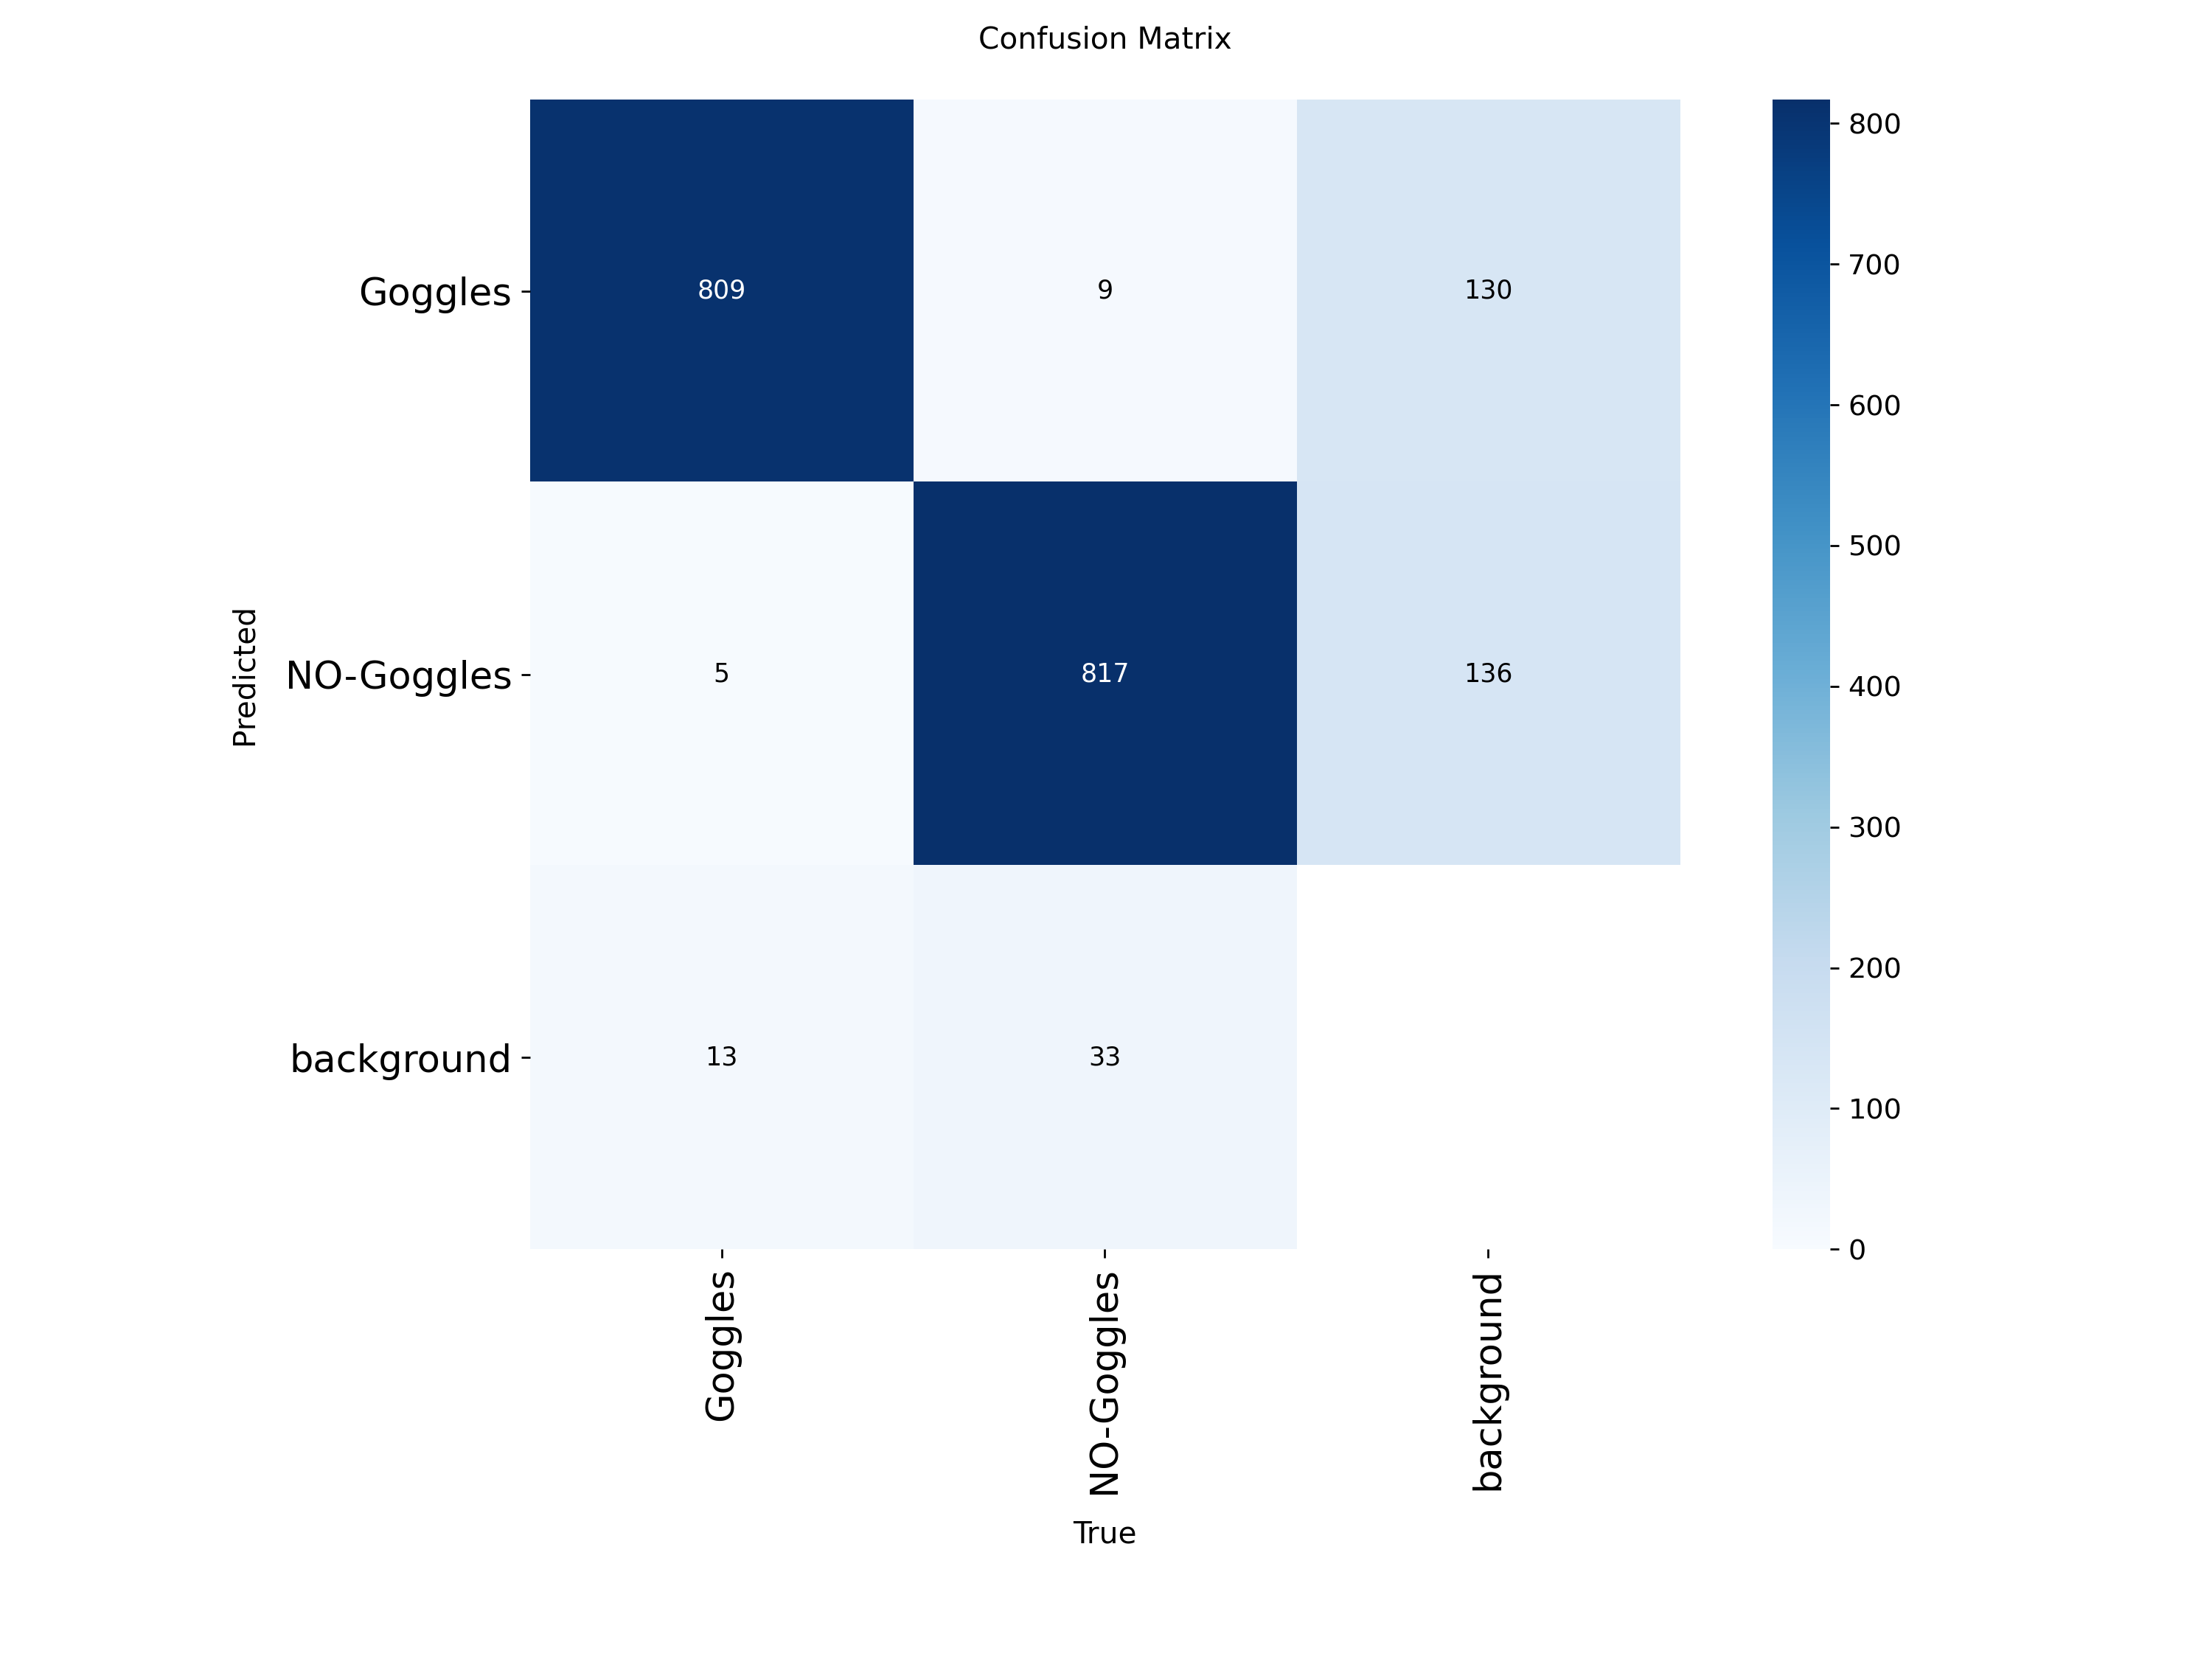

In [39]:
Image("/kaggle/working/runs/detect/train2/confusion_matrix.png", width=600)

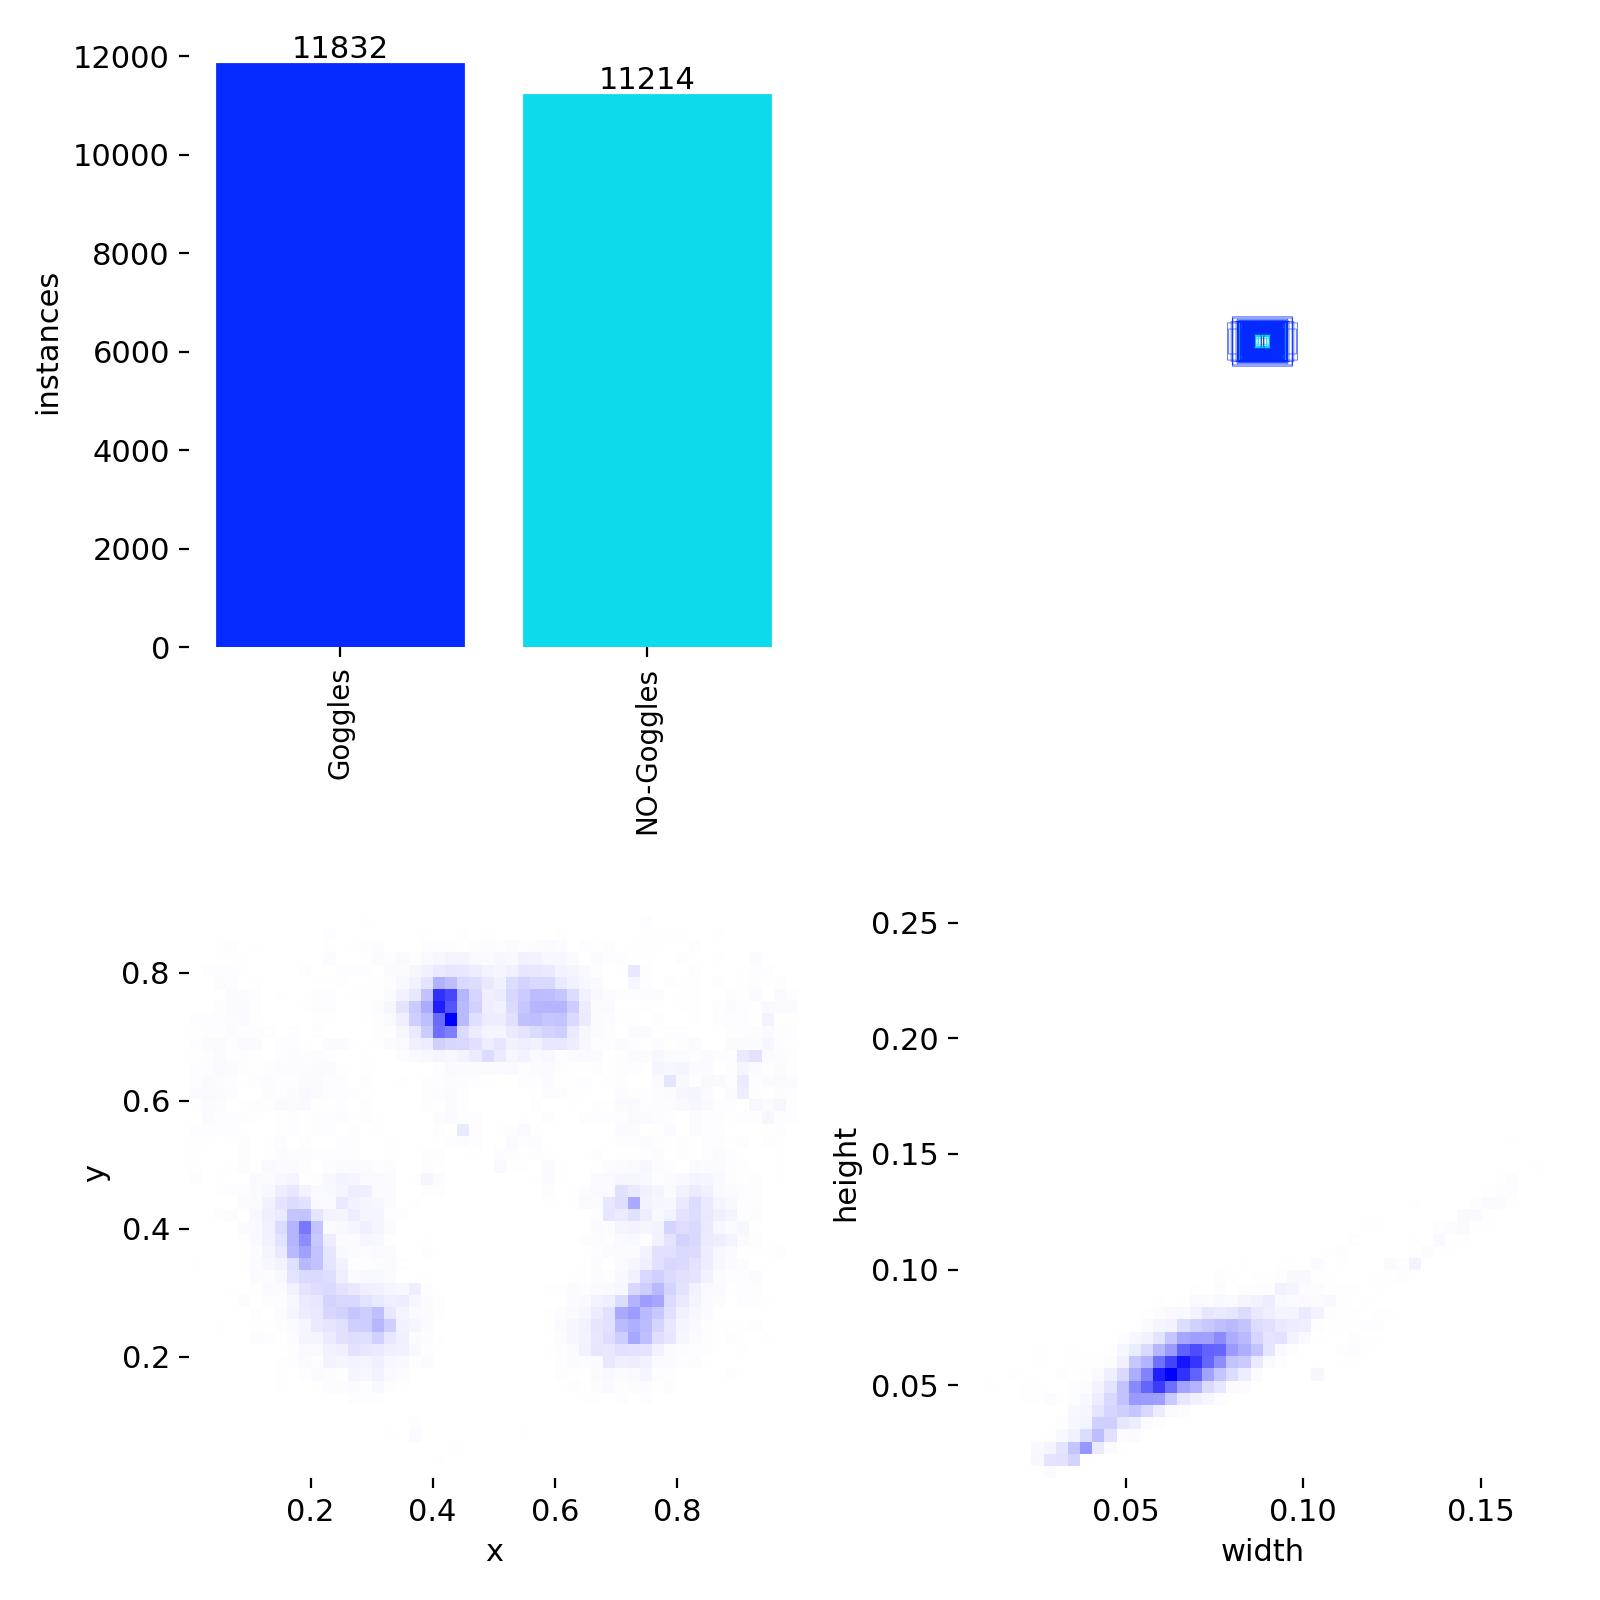

In [31]:
Image("/kaggle/working/runs/detect/train/labels.jpg", width=600)

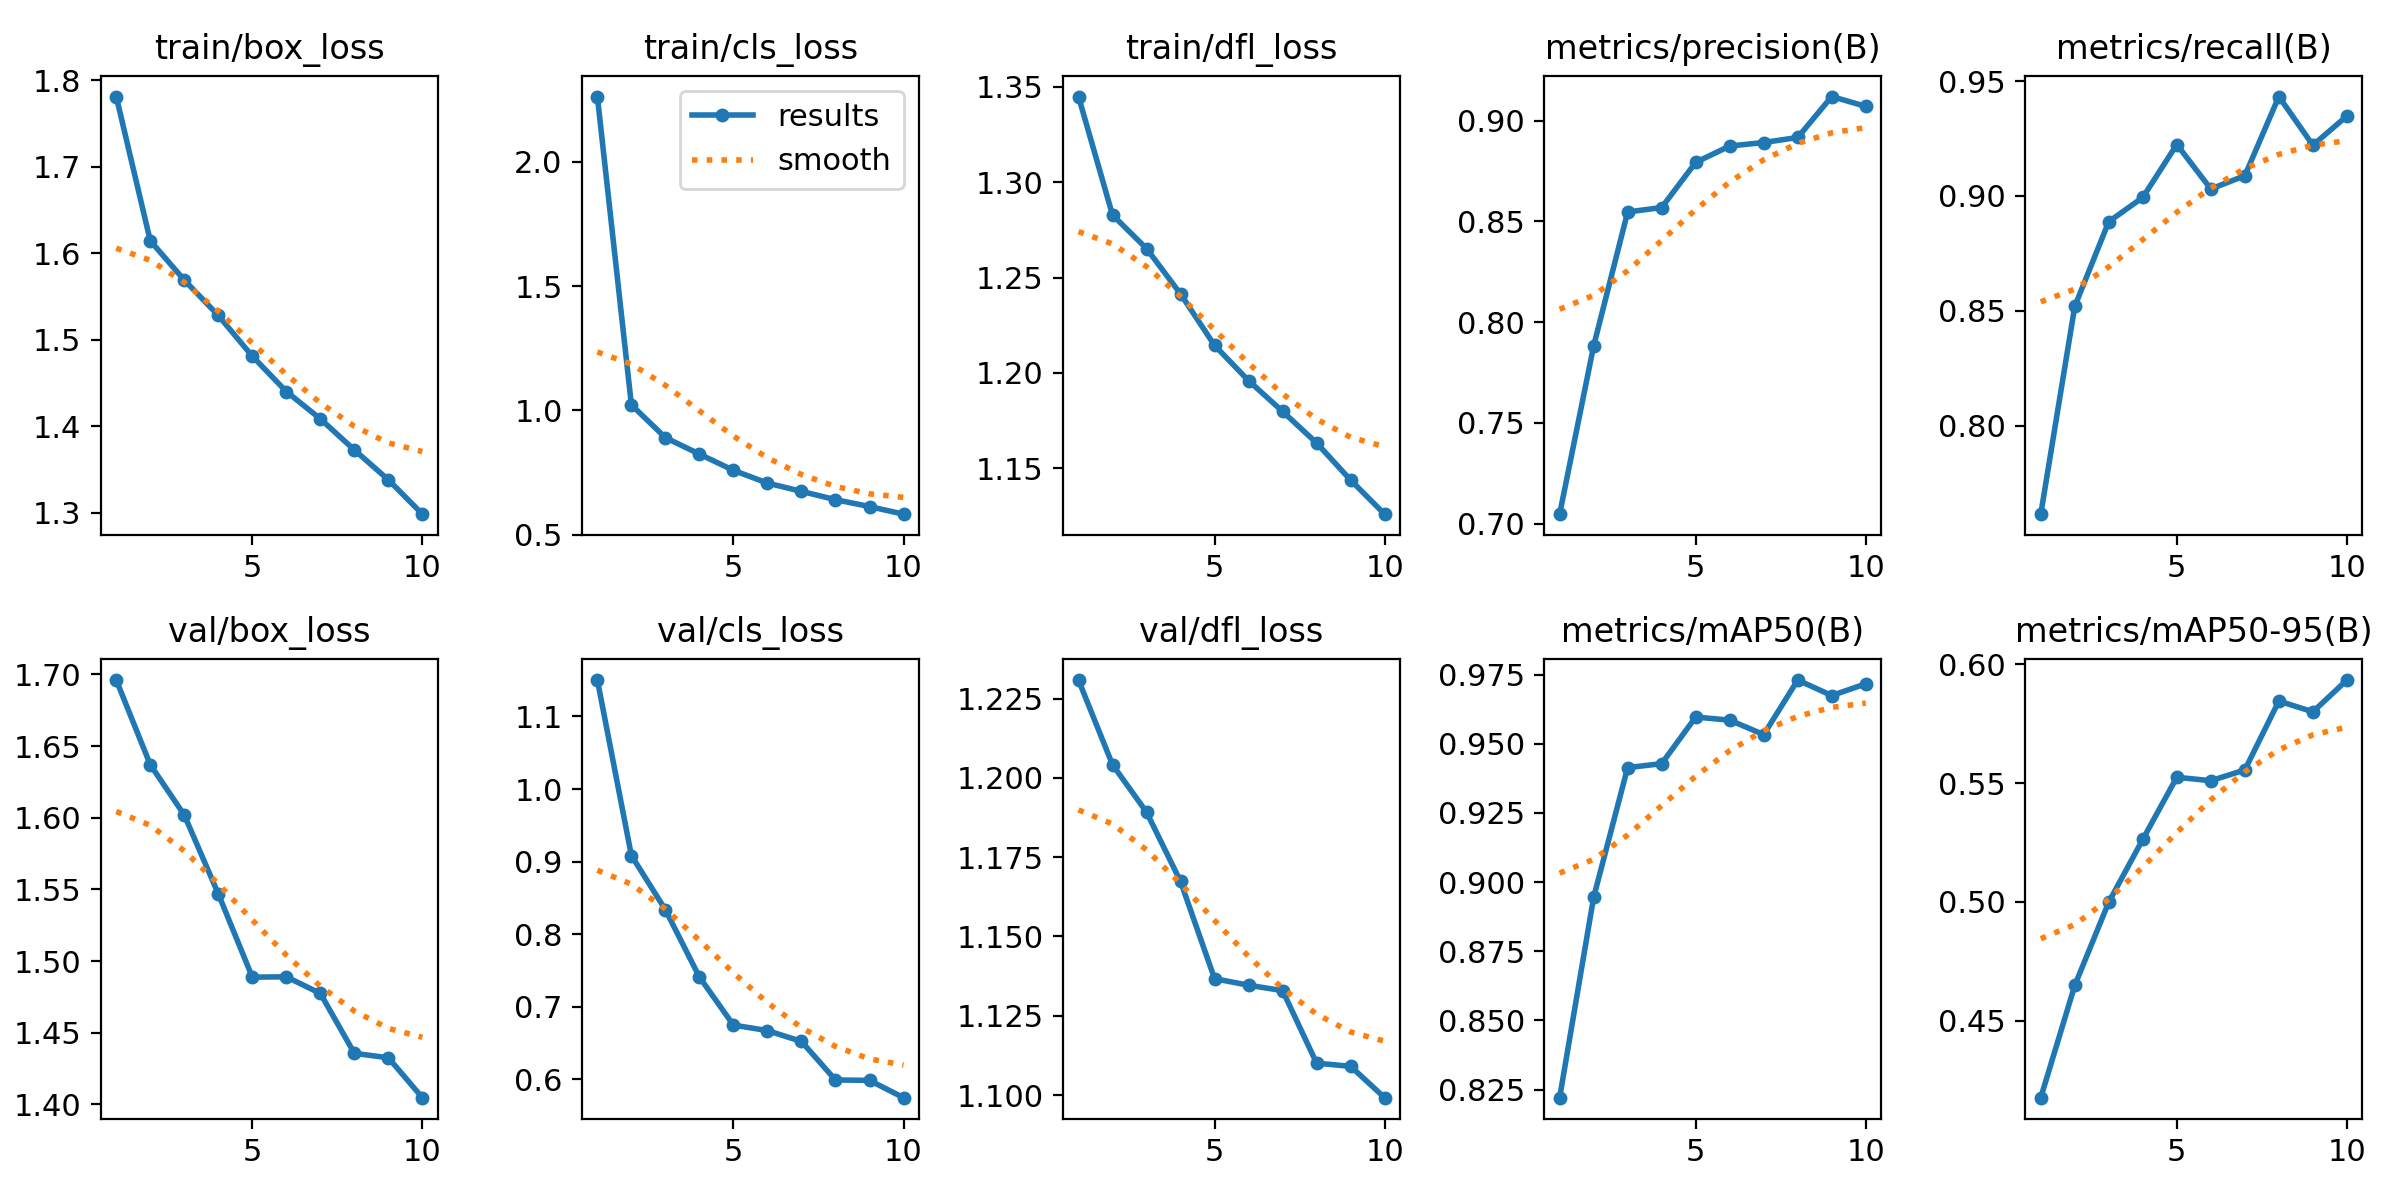

In [40]:
Image("/kaggle/working/runs/detect/train2/results.png", width=600)

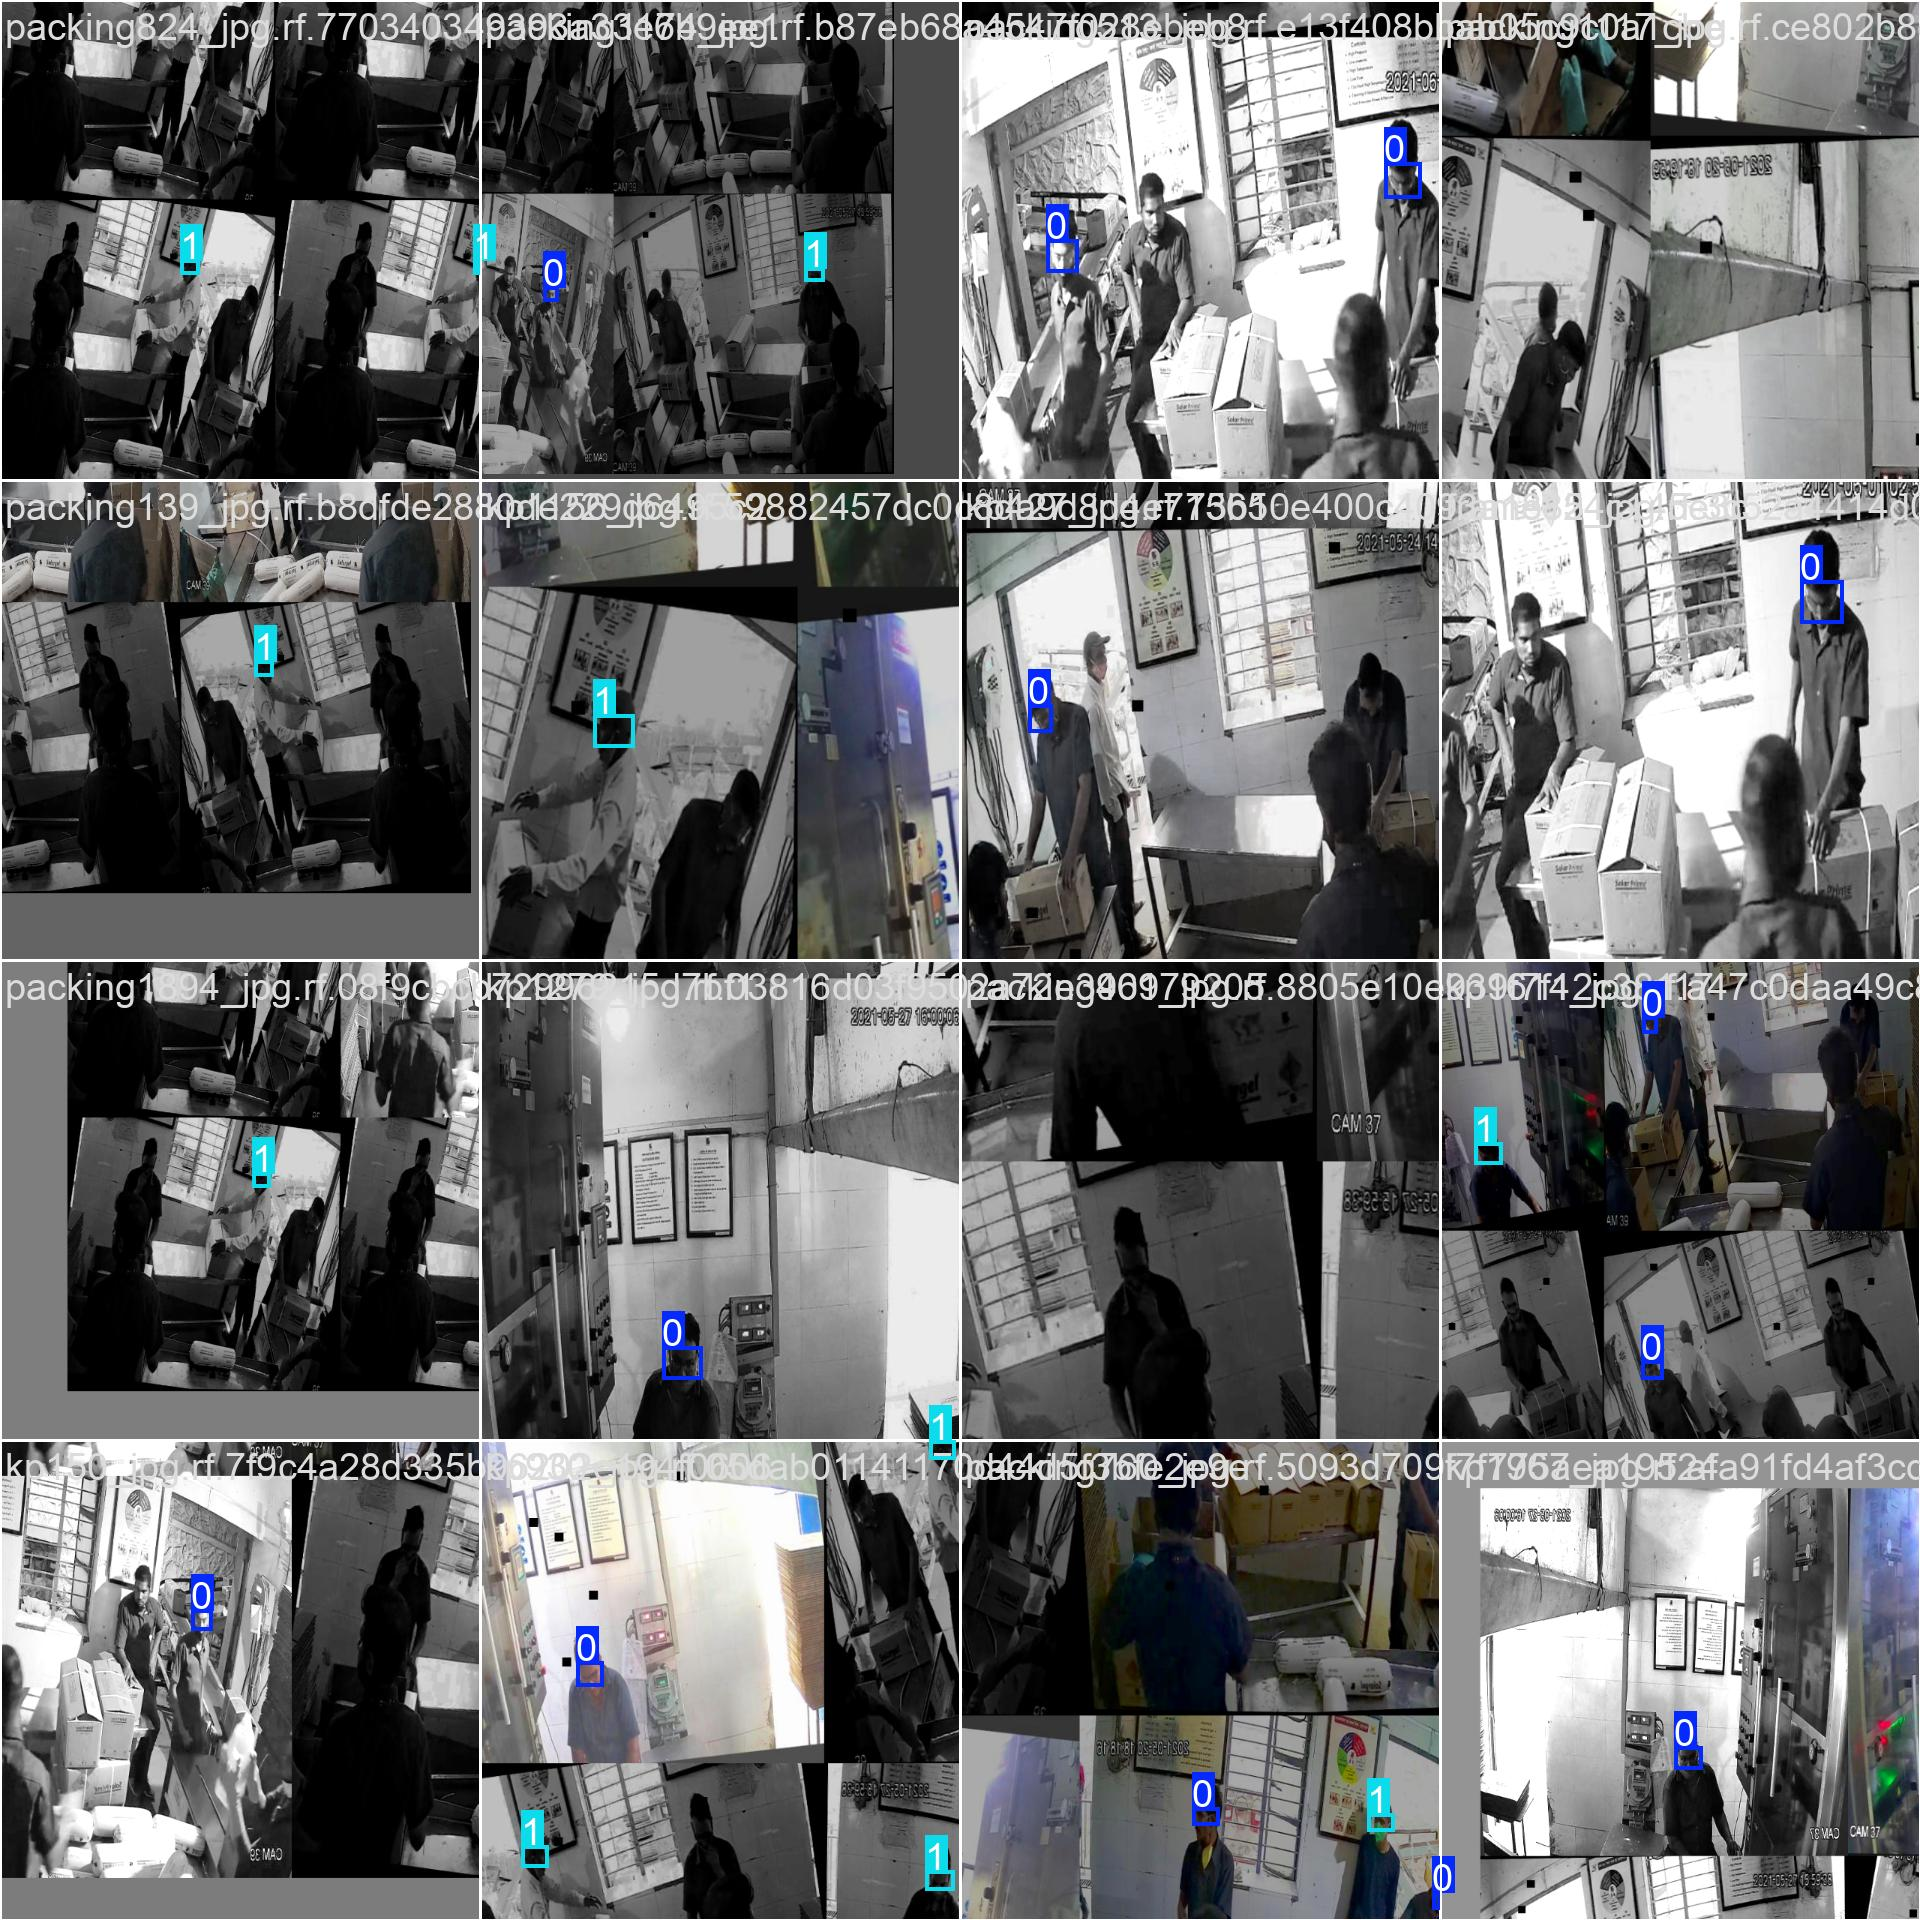

In [33]:
Image("/kaggle/working/runs/detect/train/train_batch0.jpg", width=600)

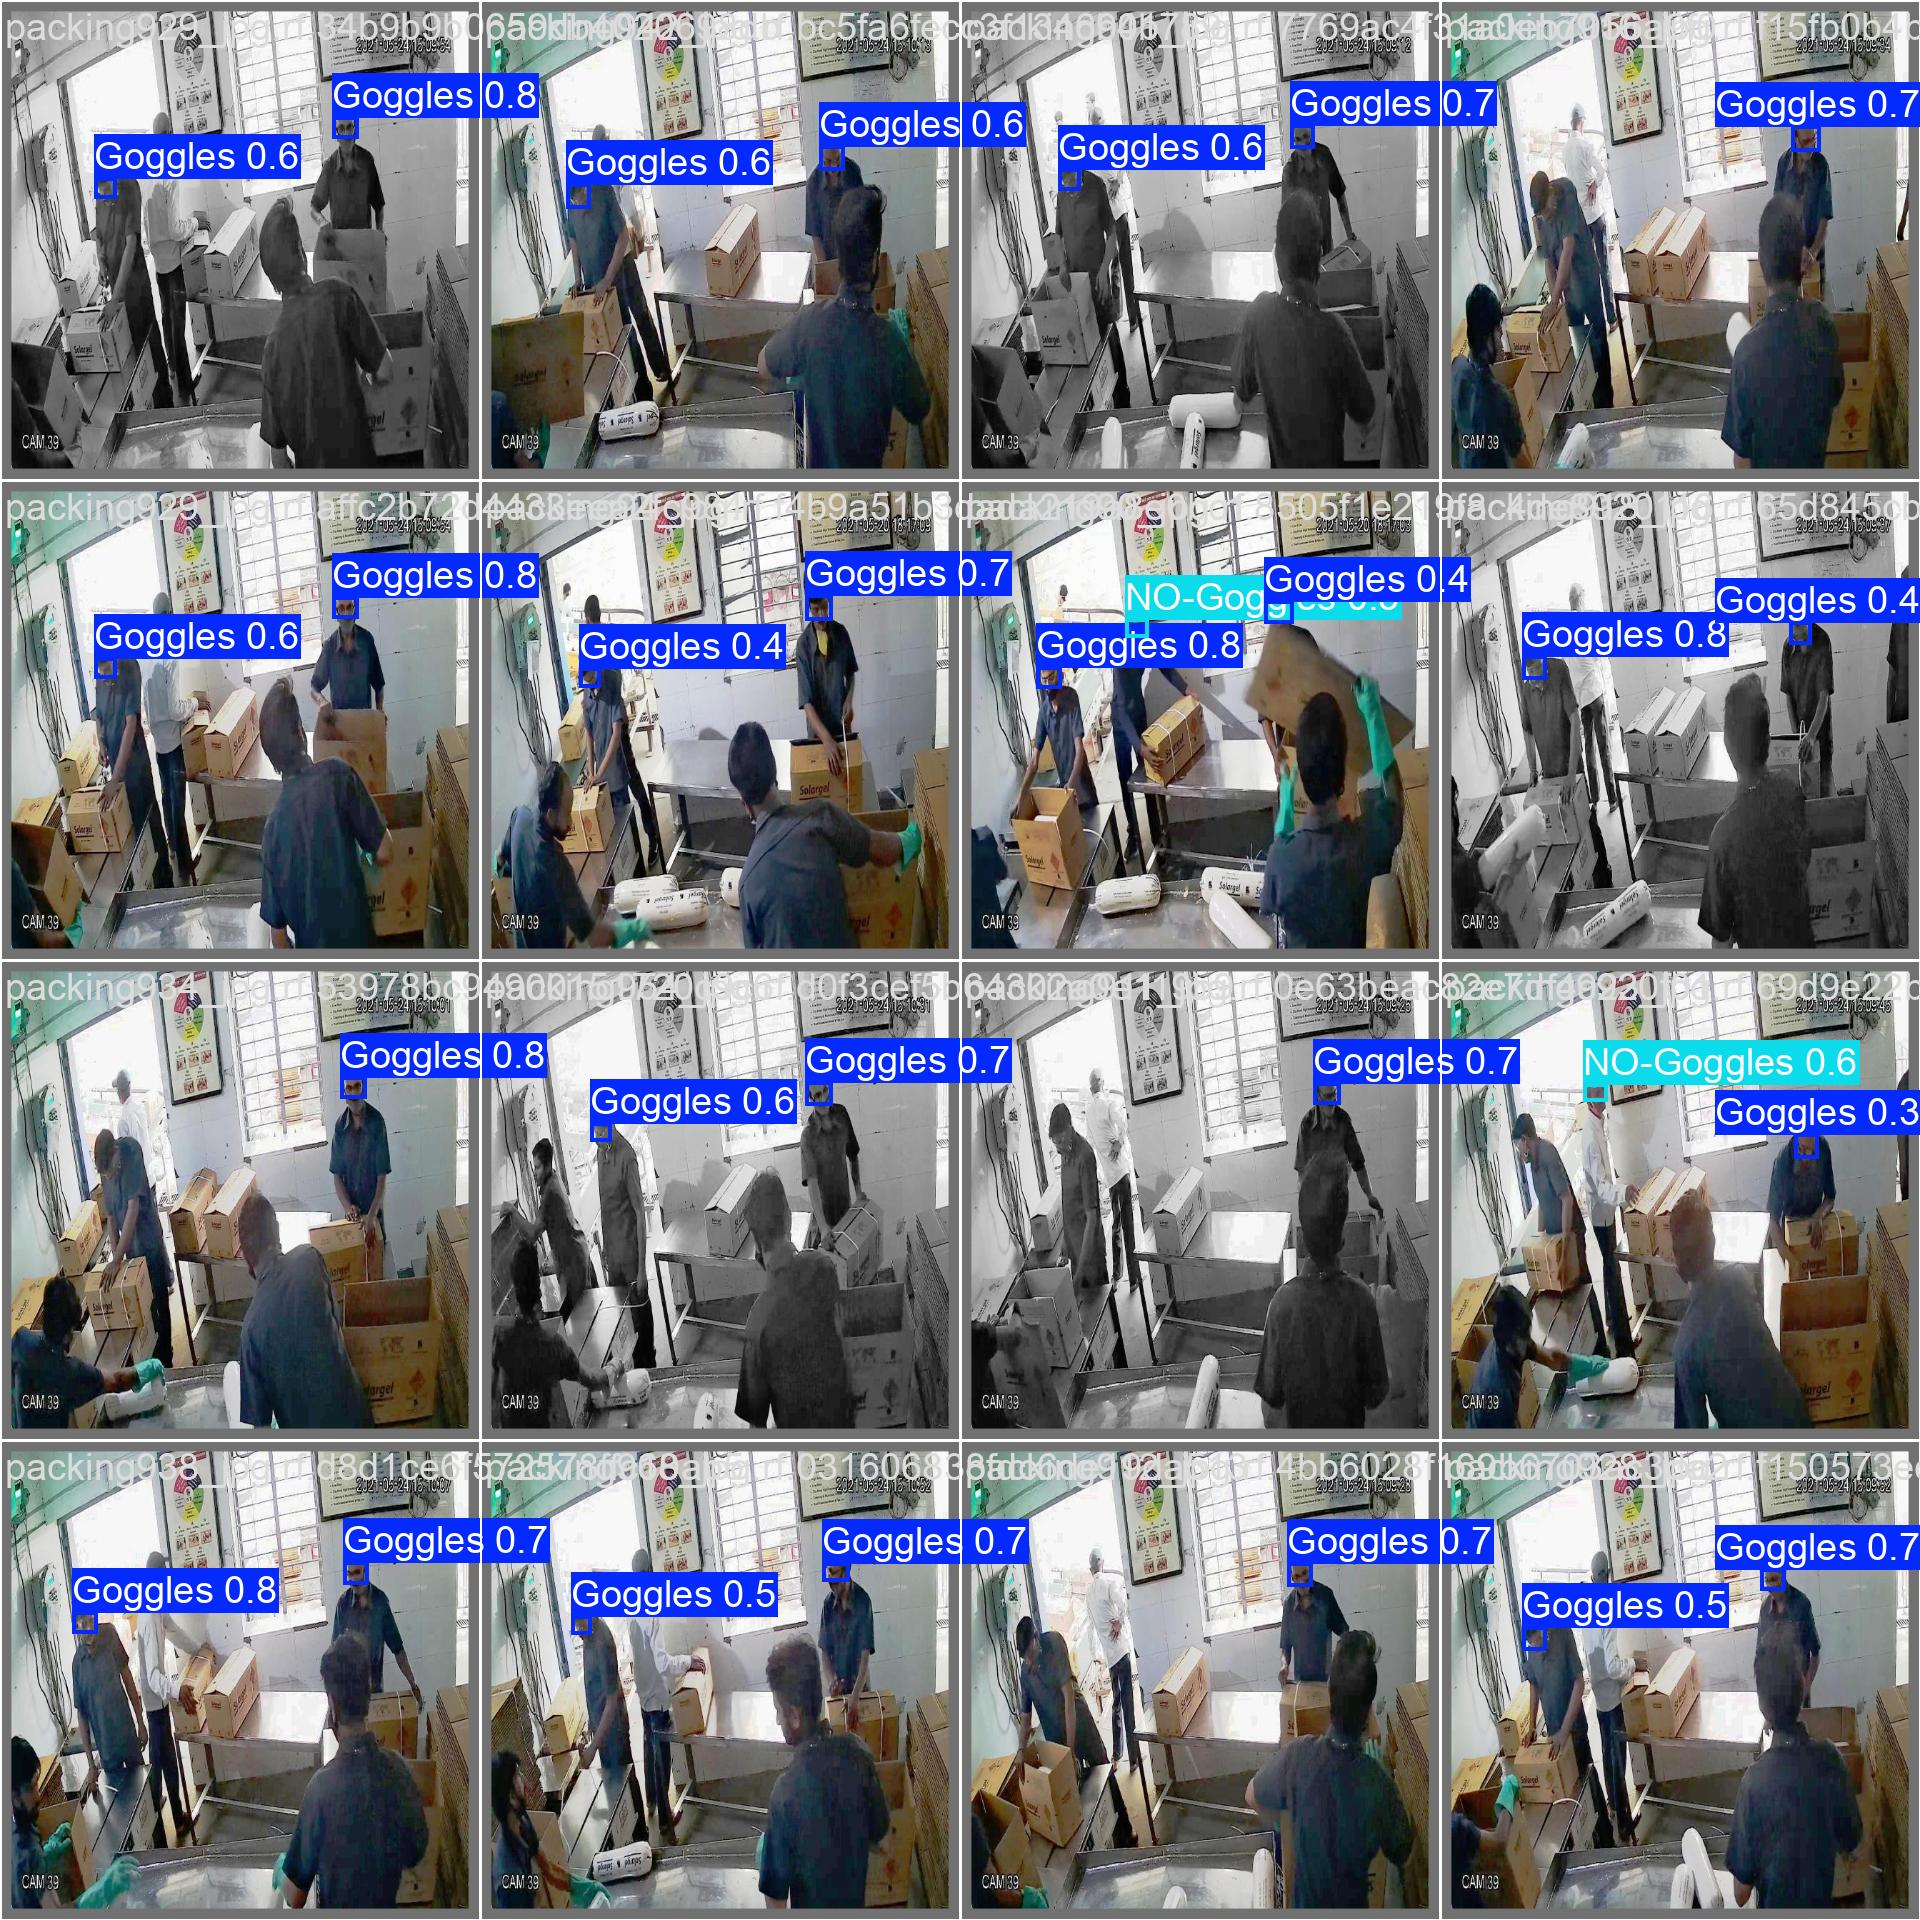

In [42]:
Image("/kaggle/working/runs/detect/train2/val_batch0_pred.jpg", width=600)

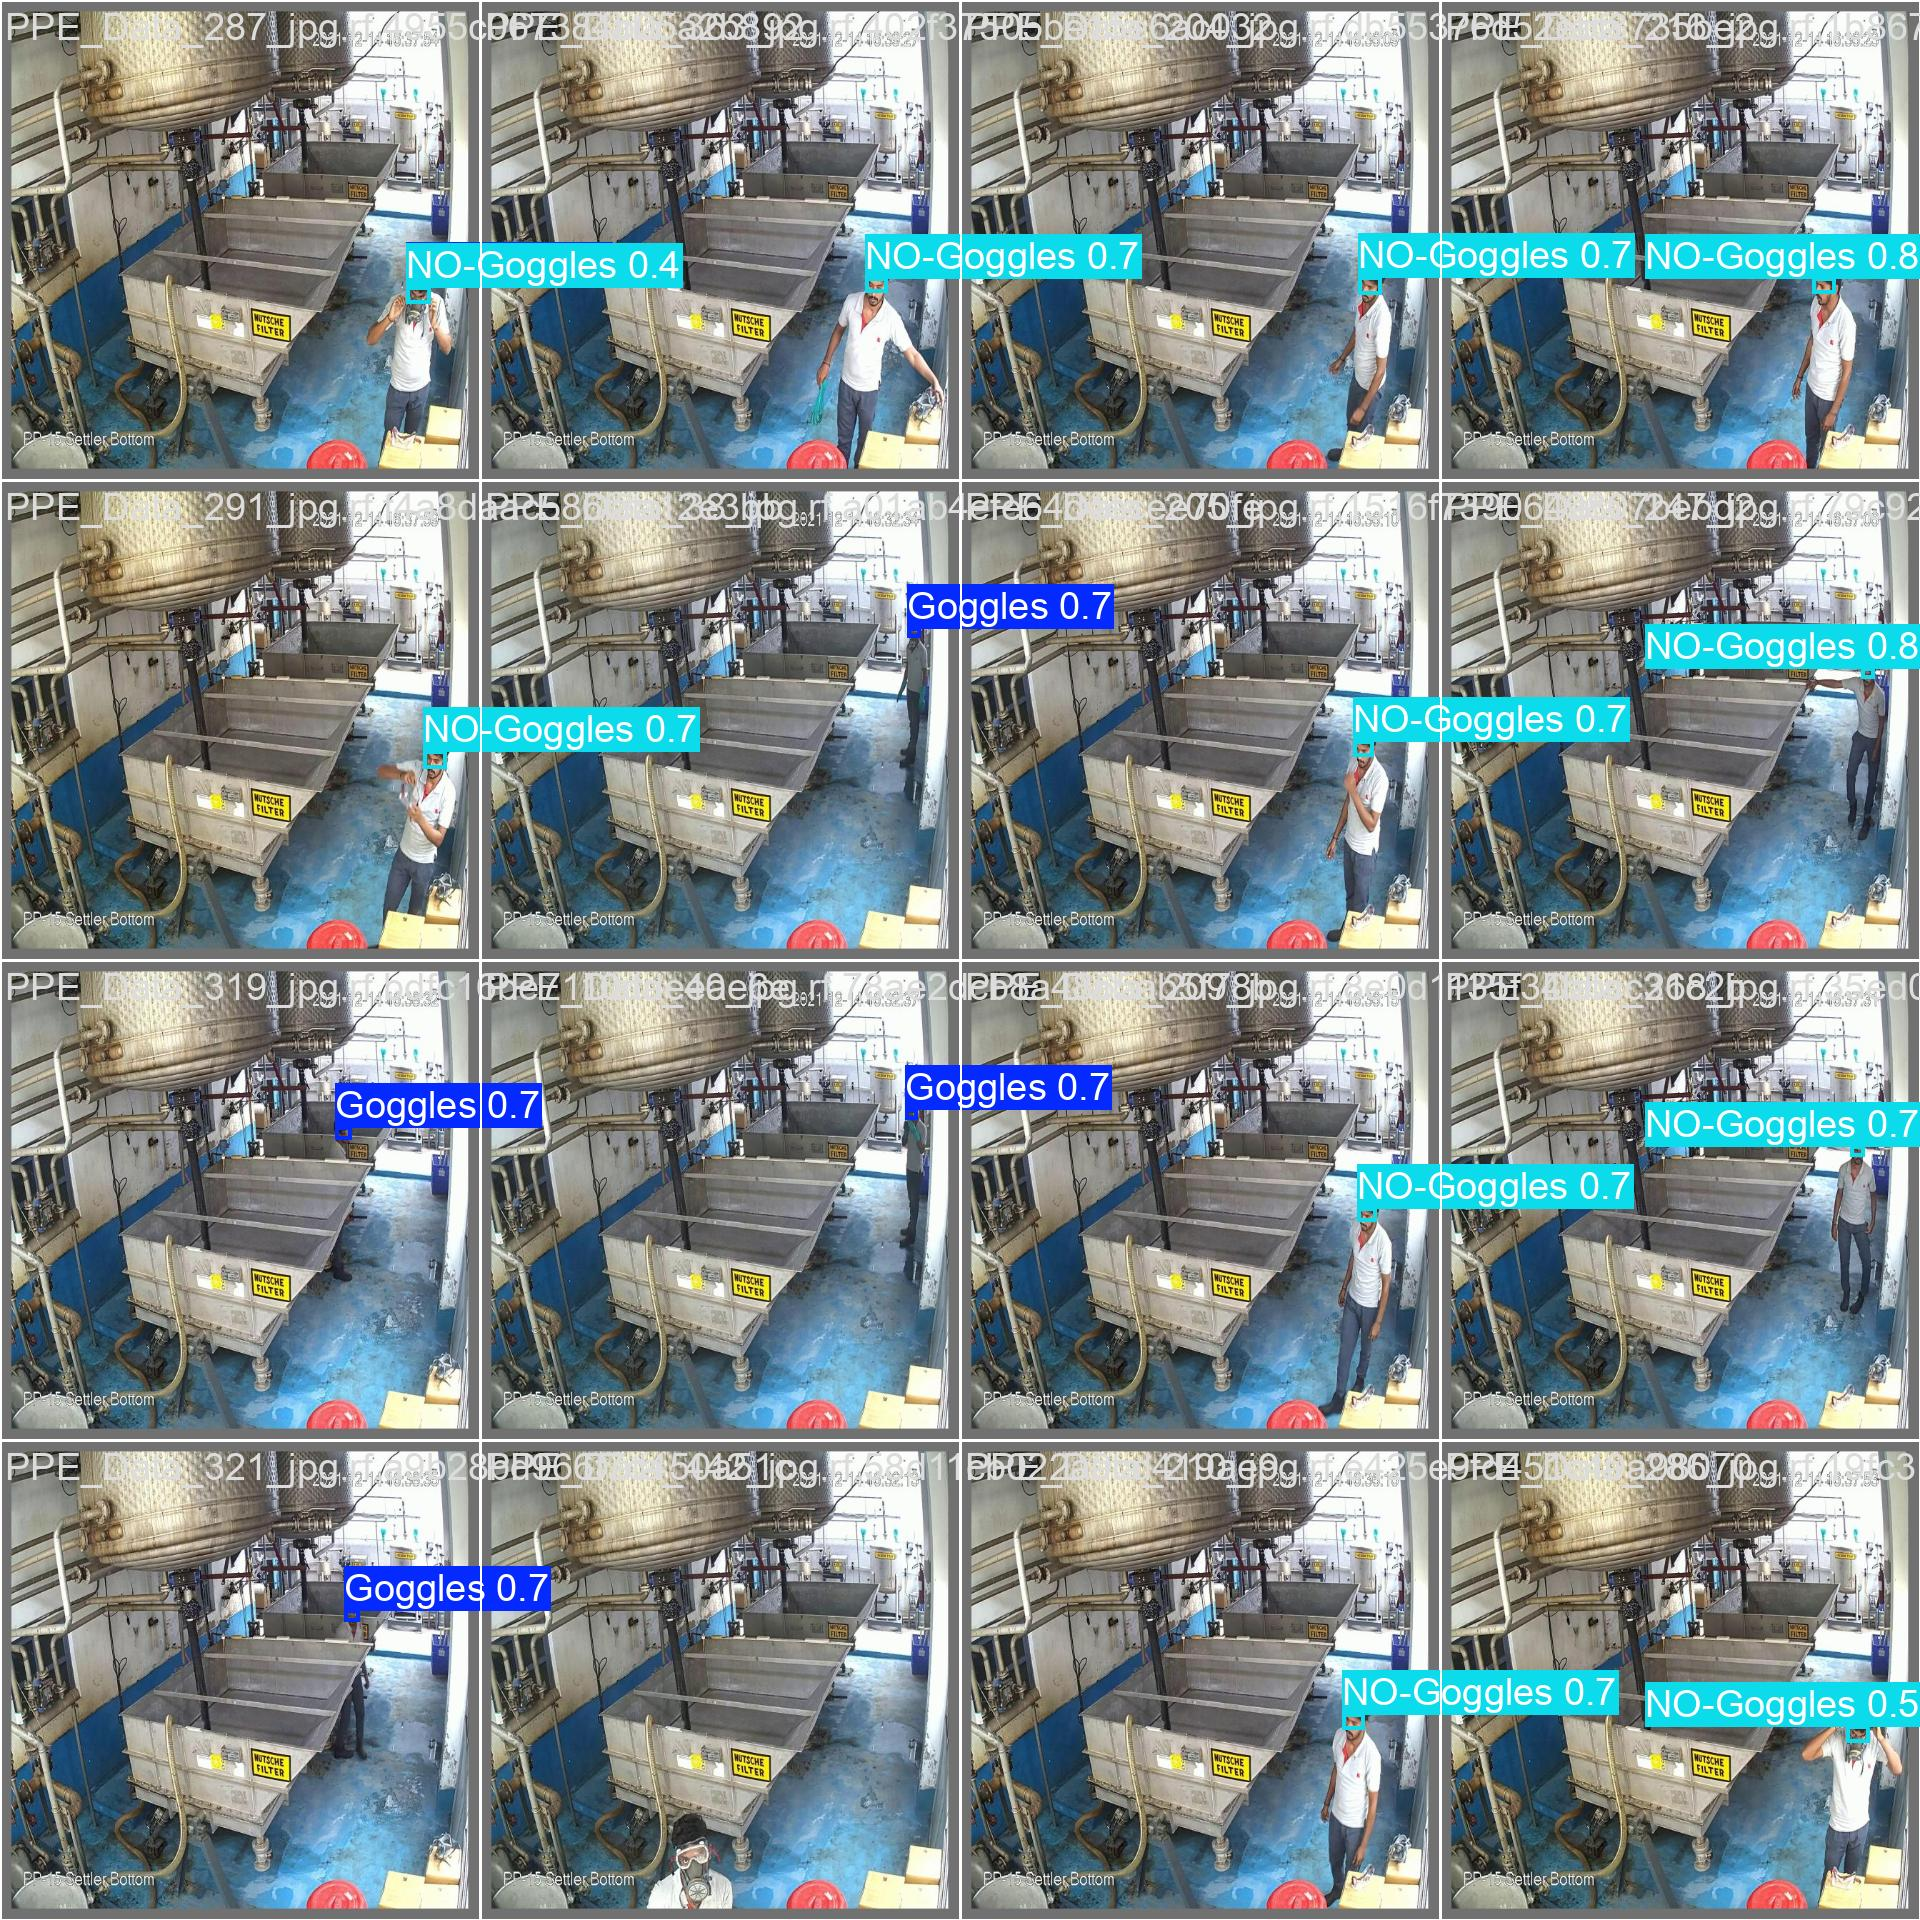

In [43]:
Image("/kaggle/working/runs/detect/train2/val_batch1_pred.jpg", width=600)

#Validation

In [45]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train2/weights/best.pt" data=/kaggle/working/Eye-Protection-7/data.yaml

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 101 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1684.9±414.0 MB/s, size: 64.1 KB)
val: Scanning /kaggle/working/Eye-Protection-7/valid/labels.cache... 1256 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1256/1256 210.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 79/79 8.6it/s 9.2s<0.2s
                   all       1256       1686      0.906      0.935      0.972      0.594
               Goggles        746        827        0.9      0.967      0.979      0.609
            NO-Goggles        679        859      0.913      0.902      0.964      0.579
Speed: 1.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /kaggle/working/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [46]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train2/weights/best.pt" conf=0.25 source=/kaggle/working/Eye-Protection-7/test/images save=True

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 101 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/627 /kaggle/working/Eye-Protection-7/test/images/NVR-09_Trim_new_Trim-2508_jpg.rf.4d4a9f967d259aecb8d2a40a3c5cf008.jpg: 640x640 1 NO-Goggles, 9.3ms
image 2/627 /kaggle/working/Eye-Protection-7/test/images/PPE_Data_124_jpg.rf.dd15c880bc850148d36dc20c85f26243.jpg: 640x640 1 Goggles, 8.8ms
image 3/627 /kaggle/working/Eye-Protection-7/test/images/PPE_Data_137_jpg.rf.7d476163aaa751a815b04ebdae3f884e.jpg: 640x640 1 Goggles, 8.2ms
image 4/627 /kaggle/working/Eye-Protection-7/test/images/PPE_Data_145_jpg.rf.0d12dbbbdfcb0c1da184805938717dc6.jpg: 640x640 1 Goggles, 7.2ms
image 5/627 /kaggle/working/Eye-Protection-7/test/images/PPE_Data_188_jpg.rf.297d5ccbb56391d3896b942cd6cd81dd.jpg: 640x640 1 NO-Goggles, 8.2ms
image 6/627 /kaggle/working/Eye-Protection-7/test/images/PPE_Data_192_jpg.rf.58f88694018093bb007c9f0e8dd

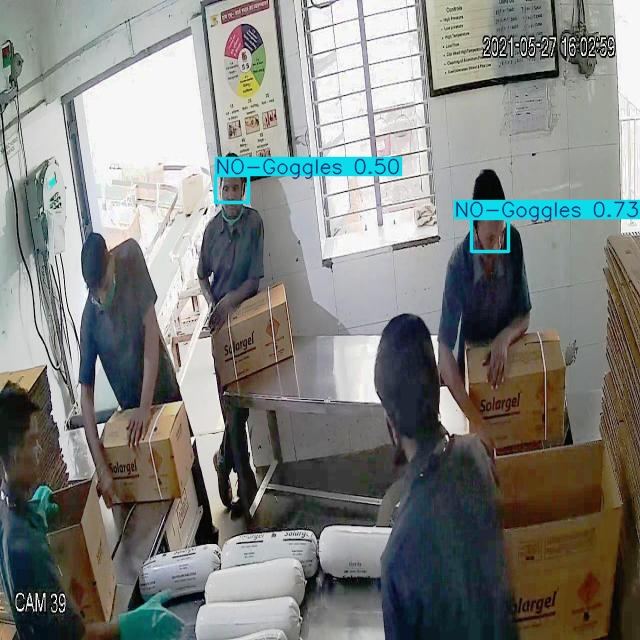

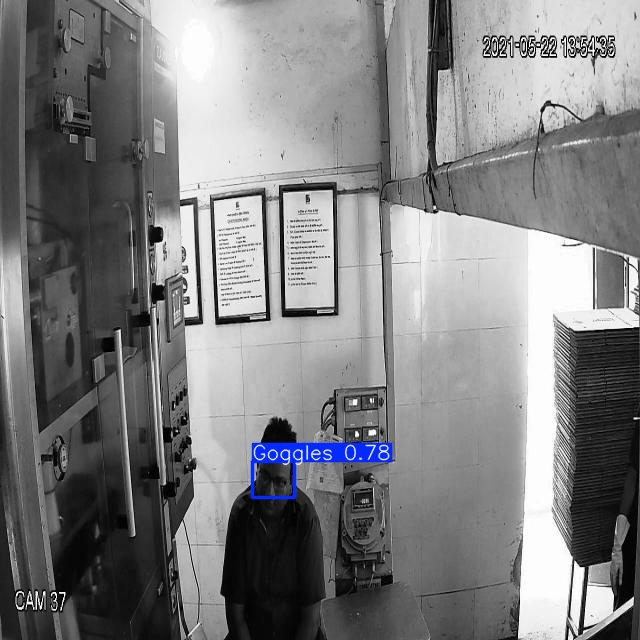

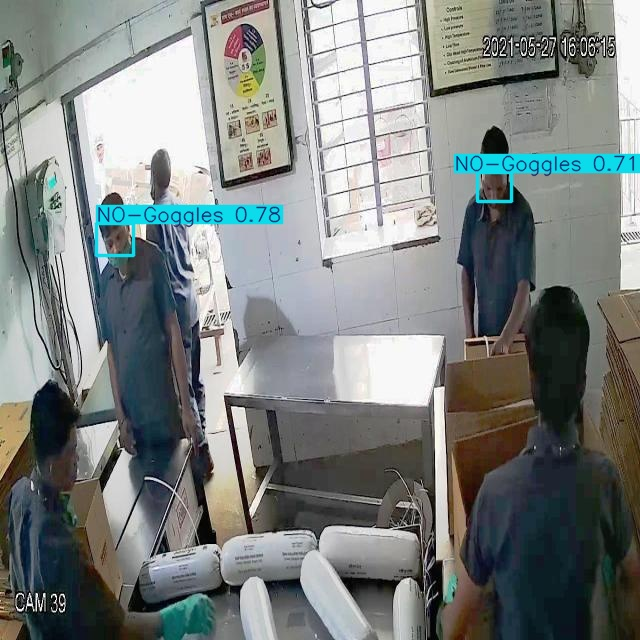

In [47]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

#testing on videos

In [48]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /kaggle/working/PPE_Part1.mp4
100%|██████████████████████████████████████| 14.2M/14.2M [00:00<00:00, 35.6MB/s]


In [51]:
!yolo task=detect mode=predict model= "/kaggle/working/runs/detect/train2/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 101 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /kaggle/working/PPE_Part1.mp4: 384x640 (no detections), 67.2ms
video 1/1 (frame 2/310) /kaggle/working/PPE_Part1.mp4: 384x640 (no detections), 9.8ms
video 1/1 (frame 3/310) /kaggle/working/PPE_Part1.mp4: 384x640 (no detections), 8.9ms
video 1/1 (frame 4/310) /kaggle/working/PPE_Part1.mp4: 384x640 (no detections), 8.4ms
video 1/1 (frame 5/310) /kaggle/working/PPE_Part1.mp4: 384x640 (no detections), 8.6ms
video 1/1 (frame 6/310) /kaggle/working/PPE_Part1.mp4: 384x640 (no detections), 8.6ms
video 1/1 (frame 7/310) /kaggle/working/PPE_Part1.mp4: 384x640 (no detections), 8.3ms
video 1/1 (frame 8/310) /kaggle/working/PPE_Part1.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 9/310) /kaggle/working/PPE_Part1.mp4: 384x640 (no detections), 8.9ms
video 1/1 (frame 10/310) /kaggle/working/PPE_Par